In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import networkx as nx
import math
from matplotlib.ticker import MultipleLocator

In [2]:
import os
os.chdir(r'C:\Users\Aaron Cherian\Documents\Python Scripts')

In [3]:
airport = pd.read_csv('Airports.csv',encoding='Latin1')
airport

,id,label,country,Lat,Lon
0,BIN,Bamyan,Afghanistan,34.800000,67.816667
1,BST,Lashkar Gah,Afghanistan,31.582998,64.360000
2,CCN,Chaghcharan,Afghanistan,34.516701,65.250001
3,DAZ,Darwaz,Afghanistan,38.466667,70.883333
4,FAH,Farah,Afghanistan,32.391730,62.096819
...,...,...,...,...,...
9028,MJW,Mahenye,Zimbabwe,-21.116667,32.383333
9029,MVZ,Masvingo,Zimbabwe,-20.059617,30.820020
9030,UTA,Mutare,Zimbabwe,-18.970019,32.650038
9031,VFA,Victoria Falls,Zimbabwe,-17.929617,25.840014


In [4]:
airports_df = airport.rename(columns={'id': 'ID', 'label': 'City', 'country' : 'Country'})
airports_df

,ID,City,Country,Lat,Lon
0,BIN,Bamyan,Afghanistan,34.800000,67.816667
1,BST,Lashkar Gah,Afghanistan,31.582998,64.360000
2,CCN,Chaghcharan,Afghanistan,34.516701,65.250001
3,DAZ,Darwaz,Afghanistan,38.466667,70.883333
4,FAH,Farah,Afghanistan,32.391730,62.096819
...,...,...,...,...,...
9028,MJW,Mahenye,Zimbabwe,-21.116667,32.383333
9029,MVZ,Masvingo,Zimbabwe,-20.059617,30.820020
9030,UTA,Mutare,Zimbabwe,-18.970019,32.650038
9031,VFA,Victoria Falls,Zimbabwe,-17.929617,25.840014


In [5]:
flight_df = pd.read_csv('Flight_Data.csv')
flight_df

,Source,Source City,Source Country,Target,Target City,Target Country,Weight
0,FNC,Funchal,Portugal,PXO,Porto Santo,Portugal,9864
1,PXO,Porto Santo,Portugal,FNC,Funchal,Portugal,9864
2,AEP,Buenos Aires,Argentina,MVD,Montevideo,Uruguay,1463
3,MVD,Montevideo,Uruguay,AEP,Buenos Aires,Argentina,1463
4,AEP,Buenos Aires,Argentina,ROS,Rosario (AR),Argentina,2261
...,...,...,...,...,...,...,...
60465,PFO,Paphos,Cyprus,LCA,Larnaca,Cyprus,945
60466,ATH,Athens (GR),Greece,TIA,Tirana,Albania,128
60467,TIA,Tirana,Albania,ATH,Athens (GR),Greece,128
60468,PRN,Pristina,Yugoslavia,TIA,Tirana,Albania,208


In [6]:
flights_df = flight_df.rename(columns={'Target': 'Target', 'Source City' : 'Source_City', 'Source Country' : 'Source_Country', 'Target City' : 'Target_City', 'Target Country' : 'Target_Country'})
flights_df

,Source,Source_City,Source_Country,Target,Target_City,Target_Country,Weight
0,FNC,Funchal,Portugal,PXO,Porto Santo,Portugal,9864
1,PXO,Porto Santo,Portugal,FNC,Funchal,Portugal,9864
2,AEP,Buenos Aires,Argentina,MVD,Montevideo,Uruguay,1463
3,MVD,Montevideo,Uruguay,AEP,Buenos Aires,Argentina,1463
4,AEP,Buenos Aires,Argentina,ROS,Rosario (AR),Argentina,2261
...,...,...,...,...,...,...,...
60465,PFO,Paphos,Cyprus,LCA,Larnaca,Cyprus,945
60466,ATH,Athens (GR),Greece,TIA,Tirana,Albania,128
60467,TIA,Tirana,Albania,ATH,Athens (GR),Greece,128
60468,PRN,Pristina,Yugoslavia,TIA,Tirana,Albania,208


In [7]:
merged_data = pd.merge(flights_df, airports_df, left_on="Source", right_on="ID", suffixes=("_Source", "_Target"))
final_data = pd.merge(merged_data, airports_df, left_on="Target", right_on="ID", suffixes=("_Source", "_Target"))
final_data

,Source,Source_City,Source_Country,Target,Target_City,Target_Country,Weight,ID_Source,City_Source,Country_Source,Lat_Source,Lon_Source,ID_Target,City_Target,Country_Target,Lat_Target,Lon_Target
0,FNC,Funchal,Portugal,PXO,Porto Santo,Portugal,9864,FNC,Funchal,Portugal,32.649983,-16.880040,PXO,Porto Santo,Portugal,33.066667,-16.350000
1,FNC,Funchal,Portugal,PXO,Porto Santo,Portugal,600,FNC,Funchal,Portugal,32.649983,-16.880040,PXO,Porto Santo,Portugal,33.066667,-16.350000
2,LIS,Lisbon,Portugal,PXO,Porto Santo,Portugal,1200,LIS,Lisbon,Portugal,38.722723,-9.144866,PXO,Porto Santo,Portugal,33.066667,-16.350000
3,LIS,Lisbon,Portugal,PXO,Porto Santo,Portugal,1680,LIS,Lisbon,Portugal,38.722723,-9.144866,PXO,Porto Santo,Portugal,33.066667,-16.350000
4,LIS,Lisbon,Portugal,PXO,Porto Santo,Portugal,432,LIS,Lisbon,Portugal,38.722723,-9.144866,PXO,Porto Santo,Portugal,33.066667,-16.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60164,EAR,Kearney,USA,OFK,Norfolk (US) NE,USA,589,EAR,Kearney,United States,40.700706,-99.081146,OFK,Stefan Field,United States,41.983333,-97.433333
60165,GRI,Grand Island,USA,OFK,Norfolk (US) NE,USA,437,GRI,Grand Island,United States,40.922268,-98.357986,OFK,Stefan Field,United States,41.983333,-97.433333
60166,BKX,Brookings,USA,HON,Huron,USA,1026,BKX,Brookings,United States,44.306765,-96.788030,HON,Huron,United States,44.383333,-98.233333
60167,JMS,Jamestown (US) ND,USA,DVL,Devils Lake,USA,1026,JMS,Jamestown (US) ND,United States,46.933333,-98.683333,DVL,Devils Lake,United States,48.112217,-98.859687


In [8]:
country_df = final_data[final_data['Country_Source'].isin(['United States', 'China', 'Australia', 'United Kingdom']) & final_data['Country_Target'].isin(['United States', 'China', 'Australia', 'United Kingdom'])]
country_df
country_df.to_csv('Final.csv')

In [9]:
final_df = pd.read_csv('Final.csv')
final_df

,Unnamed: 0,Source,Source_City,Source_Country,Target,Target_City,Target_Country,Weight,ID_Source,City_Source,Country_Source,Lat_Source,Lon_Source,ID_Target,City_Target,Country_Target,Lat_Target,Lon_Target
0,469,IOM,Isle of Man,United Kingdom,LGW,London (GB),United Kingdom,8075,IOM,Isle of Man,United Kingdom,54.083333,-4.623889,LGW,London (GB),United Kingdom,51.148056,-0.190278
1,470,EDI,Edinburgh,United Kingdom,LGW,London (GB),United Kingdom,18924,EDI,Edinburgh,United Kingdom,55.948328,-3.219091,LGW,London (GB),United Kingdom,51.148056,-0.190278
2,471,EDI,Edinburgh,United Kingdom,LGW,London (GB),United Kingdom,16958,EDI,Edinburgh,United Kingdom,55.948328,-3.219091,LGW,London (GB),United Kingdom,51.148056,-0.190278
3,474,MIA,Miami,USA,LGW,London (GB),United Kingdom,4632,MIA,Miami,United States,25.783333,-80.266667,LGW,London (GB),United Kingdom,51.148056,-0.190278
4,476,DFW,Dallas/Fort Worth,USA,LGW,London (GB),United Kingdom,3192,DFW,Dallas/Fort Worth,United States,32.896944,-97.038056,LGW,London (GB),United Kingdom,51.148056,-0.190278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17722,60164,EAR,Kearney,USA,OFK,Norfolk (US) NE,USA,589,EAR,Kearney,United States,40.700706,-99.081146,OFK,Stefan Field,United States,41.983333,-97.433333
17723,60165,GRI,Grand Island,USA,OFK,Norfolk (US) NE,USA,437,GRI,Grand Island,United States,40.922268,-98.357986,OFK,Stefan Field,United States,41.983333,-97.433333
17724,60166,BKX,Brookings,USA,HON,Huron,USA,1026,BKX,Brookings,United States,44.306765,-96.788030,HON,Huron,United States,44.383333,-98.233333
17725,60167,JMS,Jamestown (US) ND,USA,DVL,Devils Lake,USA,1026,JMS,Jamestown (US) ND,United States,46.933333,-98.683333,DVL,Devils Lake,United States,48.112217,-98.859687


In [10]:
usa_df = pd.read_csv('USA_Airports.csv')
usa_df

,Weight,ID_Source,City_Source,Country_Source,Lat_Source,Lon_Source,ID_Target,City_Target,Country_Target,Lat_Target,Lon_Target
0,144,SOV,Seldovia,United States,59.450000,-151.700000,KEB,Nanwalek,United States,59.366667,-151.916667
1,248,SOV,Seldovia,United States,59.450000,-151.700000,KEB,Nanwalek,United States,59.366667,-151.916667
2,279,SOV,Seldovia,United States,59.450000,-151.700000,KEB,Nanwalek,United States,59.366667,-151.916667
3,558,PGM,Port Graham,United States,59.350000,-151.833333,KEB,Nanwalek,United States,59.366667,-151.916667
4,1736,PGM,Port Graham,United States,59.350000,-151.833333,KEB,Nanwalek,United States,59.366667,-151.916667
...,...,...,...,...,...,...,...,...,...,...,...
13214,30,SCJ,Smith Cove,United States,55.437500,-132.341667,KXA,Kasaan,United States,55.500000,-132.500000
13215,589,EAR,Kearney,United States,40.700706,-99.081146,OFK,Stefan Field,United States,41.983333,-97.433333
13216,437,GRI,Grand Island,United States,40.922268,-98.357986,OFK,Stefan Field,United States,41.983333,-97.433333
13217,1026,BKX,Brookings,United States,44.306765,-96.788030,HON,Huron,United States,44.383333,-98.233333


In [11]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

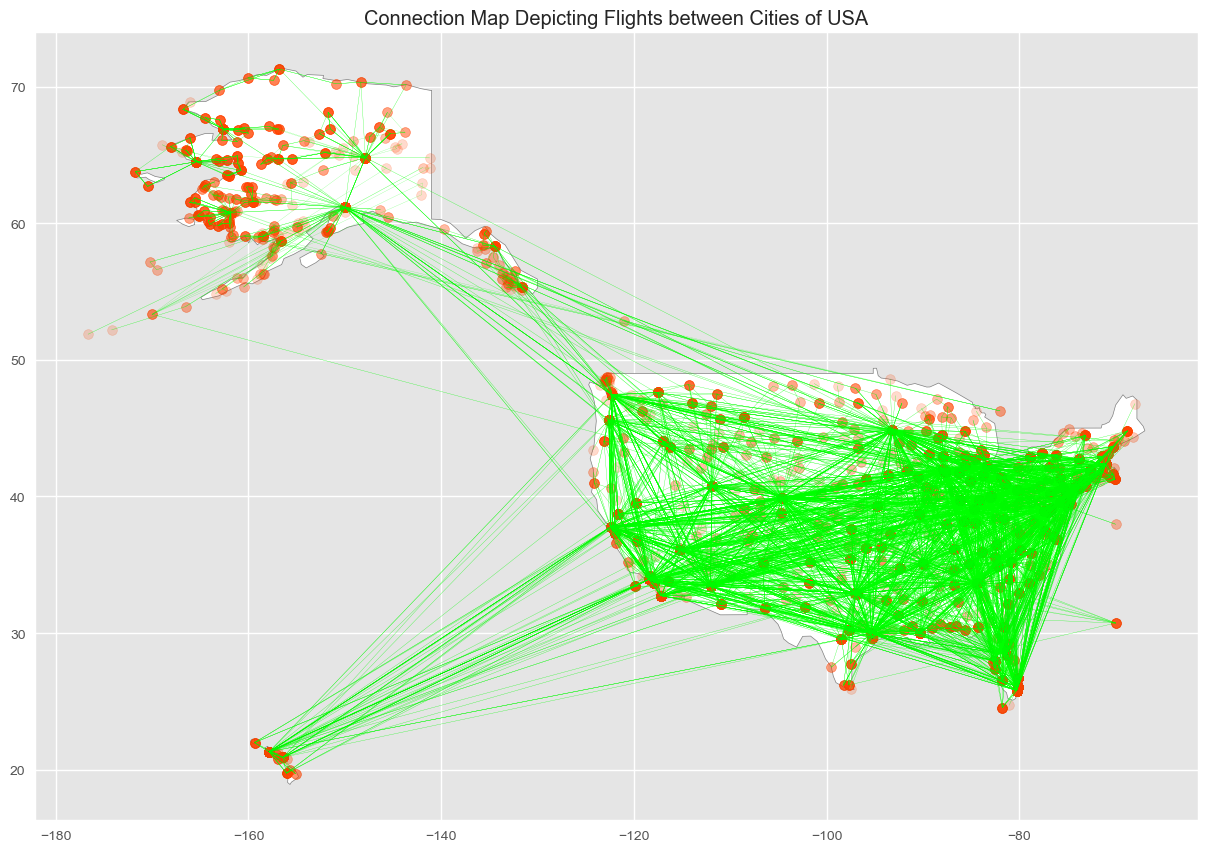

In [103]:
with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world[world.name == "United States of America"].plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    for slat,dlat, slon, dlon, src_city, dest_city in zip(usa_df["Lat_Source"], usa_df["Lat_Target"], usa_df["Lon_Source"], usa_df["Lon_Target"], usa_df["City_Source"], usa_df["City_Target"]):
        plt.scatter( [slon, dlon], [slat, dlat], color="orangered", alpha=0.1)
        plt.plot([slon , dlon], [slat, dlat], linewidth=0.2, color="lime", alpha=0.5)
        
        #plt.text(slon+0.5, slat+0.5, src_city, fontsize=8, color="dodgerblue", alpha=0.1, horizontalalignment='center', verticalalignment='center')
        #plt.text(dlon+0.5, dlat+0.5, dest_city, fontsize=8, color="dodgerblue", alpha=0.1, horizontalalignment='center', verticalalignment='center')
        
       

    plt.title("Connection Map Depicting Flights between Cities of USA")

    plt.savefig("connection-map-geopandas-4.png", dpi=100)
    plt.show()


In [26]:
uk_df = pd.read_csv('UK_Airports.csv')
uk_df

,Weight,ID_Source,City_Source,Country_Source,Lat_Source,Lon_Source,ID_Target,City_Target,Country_Target,Lat_Target,Lon_Target
0,8075,IOM,Isle of Man,United Kingdom,54.083333,-4.623889,LGW,London (GB),United Kingdom,51.148056,-0.190278
1,18924,EDI,Edinburgh,United Kingdom,55.948328,-3.219091,LGW,London (GB),United Kingdom,51.148056,-0.190278
2,16958,EDI,Edinburgh,United Kingdom,55.948328,-3.219091,LGW,London (GB),United Kingdom,51.148056,-0.190278
3,296,BHD,Belfast,United Kingdom,54.618056,-5.872500,LGW,London (GB),United Kingdom,51.148056,-0.190278
4,10800,BHD,Belfast,United Kingdom,54.618056,-5.872500,LGW,London (GB),United Kingdom,51.148056,-0.190278
...,...,...,...,...,...,...,...,...,...,...,...
631,240,FIE,Fair Isle,United Kingdom,59.500000,-1.666667,LWK,Shetland Islands,United Kingdom,60.200000,-1.125000
632,3822,PZE,Penzance,United Kingdom,50.133722,-5.550034,TSO,Tresco,United Kingdom,49.950000,-6.316667
633,7566,PZE,Penzance,United Kingdom,50.133722,-5.550034,ISC,Isles of Scilly,United Kingdom,49.900000,-6.400000
634,3822,TSO,Tresco,United Kingdom,49.950000,-6.316667,PZE,Penzance,United Kingdom,50.133722,-5.550034


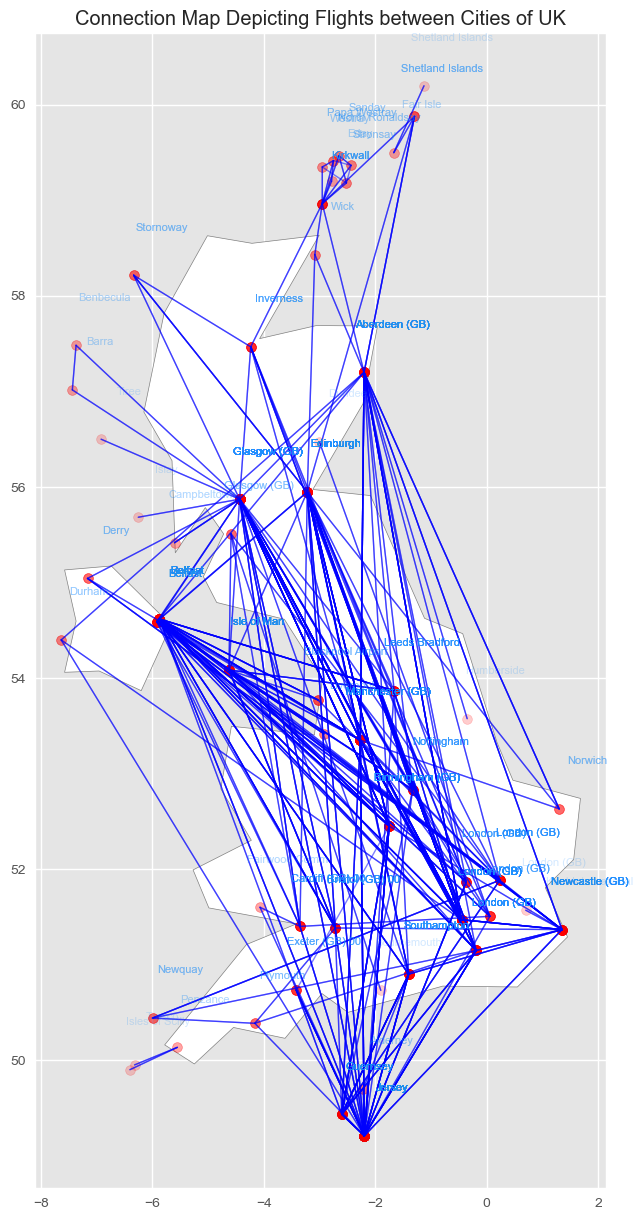

In [105]:
with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world[world.name == "United Kingdom"].plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    for slat,dlat, slon, dlon, src_city, dest_city in zip(uk_df["Lat_Source"], uk_df["Lat_Target"], uk_df["Lon_Source"], uk_df["Lon_Target"], uk_df["City_Source"], uk_df["City_Target"]):
        plt.plot([slon , dlon], [slat, dlat], linewidth=1, color="blue", alpha=0.5)
        plt.scatter( [slon, dlon], [slat, dlat], color="red", alpha=0.1)
        
        plt.text(slon+0.5, slat+0.5, src_city, fontsize=8, color="dodgerblue", alpha=0.1, horizontalalignment='center', verticalalignment='center')
        plt.text(dlon+0.5, dlat+0.5, dest_city, fontsize=8, color="dodgerblue", alpha=0.1, horizontalalignment='center', verticalalignment='center')
       

    plt.title("Connection Map Depicting Flights between Cities of UK")

    plt.savefig("connection-map-geopandas-4.png", dpi=100)
    plt.show()


In [12]:
china_df = pd.read_csv('China_Airports.csv')
china_df

,Weight,ID_Source,City_Source,Country_Source,Lat_Source,Lon_Source,ID_Target,City_Target,Country_Target,Lat_Target,Lon_Target
0,1924,SZX,Shenzhen,China,22.552371,114.122123,XMN,Xiamen,China,24.449992,118.080017
1,11454,SZX,Shenzhen,China,22.552371,114.122123,XMN,Xiamen,China,24.449992,118.080017
2,4692,SZX,Shenzhen,China,22.552371,114.122123,XMN,Xiamen,China,24.449992,118.080017
3,7208,SZX,Shenzhen,China,22.552371,114.122123,XMN,Xiamen,China,24.449992,118.080017
4,1586,PEK,Beijing,China,40.063333,116.584444,XMN,Xiamen,China,24.449992,118.080017
...,...,...,...,...,...,...,...,...,...,...,...
2597,1008,KCA,Kuqa,China,41.727749,82.936374,AKU,Aksu,China,41.150006,80.250026
2598,992,WUH,Wuhan,China,30.580031,114.270017,ENH,Enshi,China,30.283333,109.316667
2599,992,XIY,Xi'an,China,34.447222,108.751667,UYN,Yulin,China,22.629974,110.150010
2600,992,XIY,Xi'an,China,34.447222,108.751667,HZG,Hanzhong,China,33.129979,107.029994


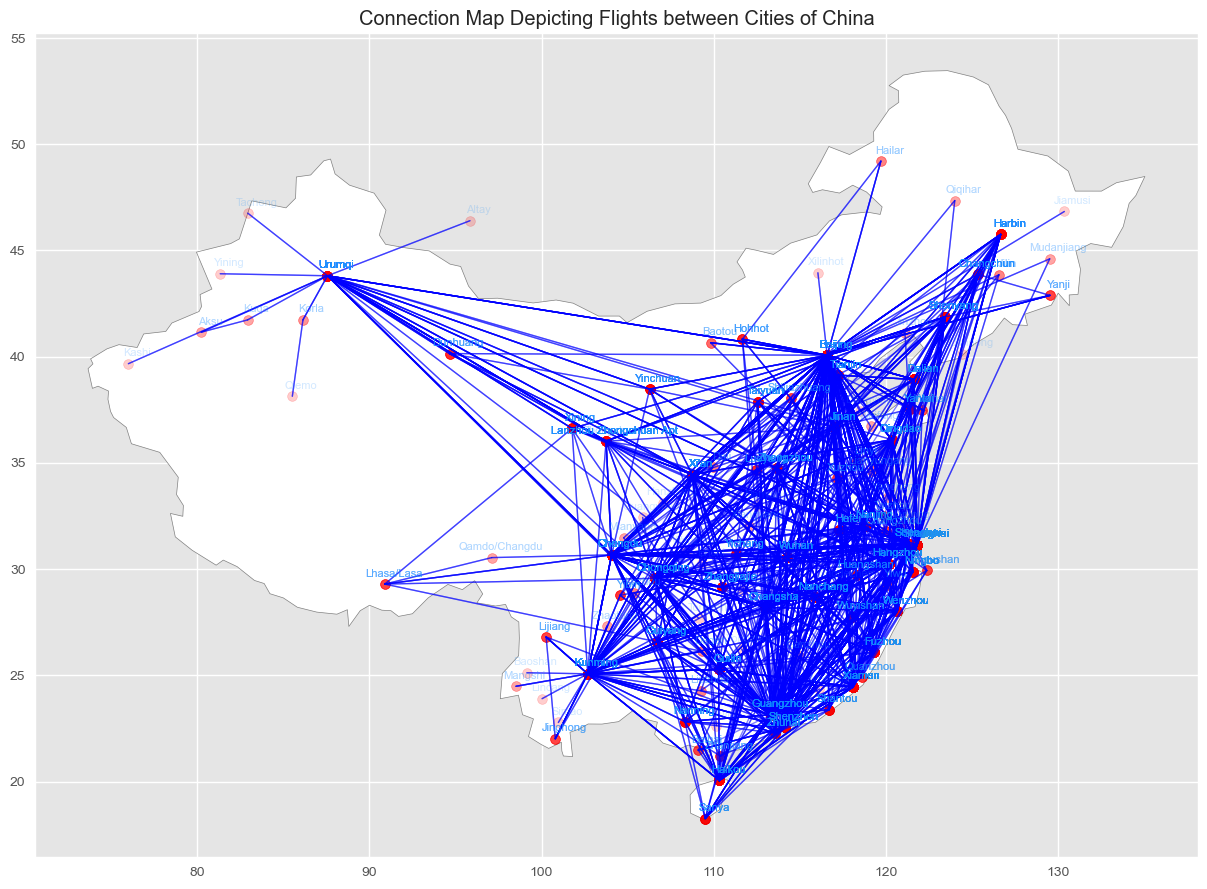

In [50]:
with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world[world.name == "China"].plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    for slat,dlat, slon, dlon, src_city, dest_city in zip(china_df["Lat_Source"], china_df["Lat_Target"], china_df["Lon_Source"], china_df["Lon_Target"], china_df["City_Source"], china_df["City_Target"]):
        plt.plot([slon , dlon], [slat, dlat], linewidth=1, color="blue", alpha=0.5)
        plt.scatter( [slon, dlon], [slat, dlat], color="red", alpha=0.1)
        
        plt.text(slon+0.5, slat+0.5, src_city, fontsize=8, color="dodgerblue", alpha=0.1, horizontalalignment='center', verticalalignment='center')
        plt.text(dlon+0.5, dlat+0.5, dest_city, fontsize=8, color="dodgerblue", alpha=0.1, horizontalalignment='center', verticalalignment='center')
       

    plt.title("Connection Map Depicting Flights between Cities of China")

    plt.savefig("connection-map-geopandas-4.png", dpi=100)
    plt.show()


In [13]:
aus_df = pd.read_csv('Australia_Airports.csv')
aus_df

,Weight,ID_Source,City_Source,Country_Source,Lat_Source,Lon_Source,ID_Target,City_Target,Country_Target,Lat_Target,Lon_Target
0,1084,SYD,Sydney (AU),Australia,-33.946111,151.177222,MEL,Melbourne (AU),Australia,-37.673333,144.843333
1,79488,SYD,Sydney (AU),Australia,-33.946111,151.177222,MEL,Melbourne (AU),Australia,-37.673333,144.843333
2,10008,SYD,Sydney (AU),Australia,-33.946111,151.177222,MEL,Melbourne (AU),Australia,-37.673333,144.843333
3,28569,SYD,Sydney (AU),Australia,-33.946111,151.177222,MEL,Melbourne (AU),Australia,-37.673333,144.843333
4,45510,SYD,Sydney (AU),Australia,-33.946111,151.177222,MEL,Melbourne (AU),Australia,-37.673333,144.843333
...,...,...,...,...,...,...,...,...,...,...,...
1035,243,HID,Horn Island,Australia,-10.536667,142.290000,MYI,Murray Island,Australia,-9.933333,144.016667
1036,260,HID,Horn Island,Australia,-10.536667,142.290000,MYI,Murray Island,Australia,-9.933333,144.016667
1037,380,NLF,Darnley Island,Australia,-9.566667,143.750000,MYI,Murray Island,Australia,-9.933333,144.016667
1038,2088,NAA,Narrabri,Australia,-30.331910,149.787436,MRZ,Moree,Australia,-29.469895,149.830069


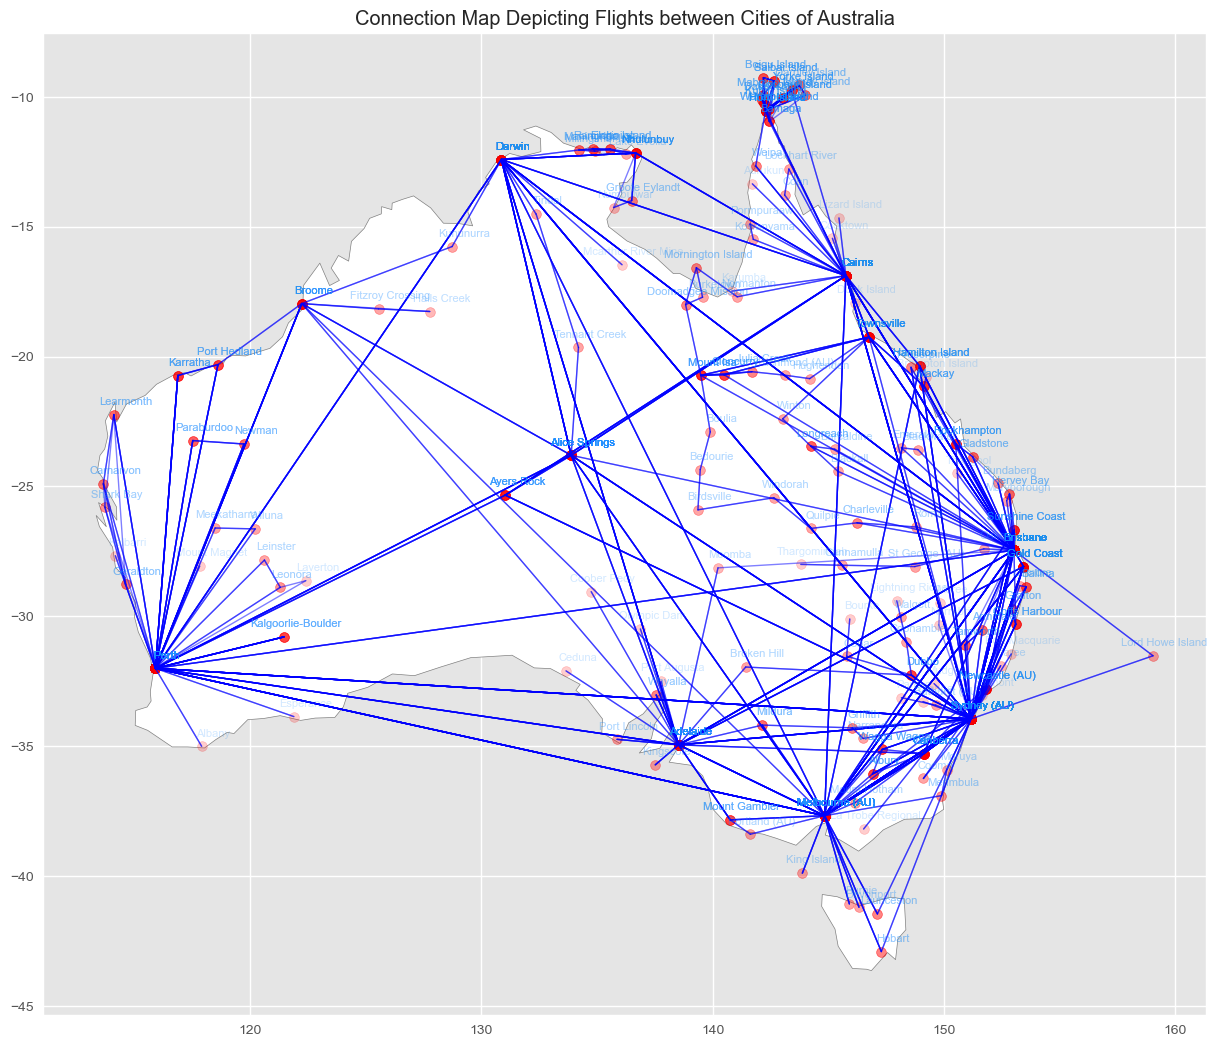

In [49]:
with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world[world.name == "Australia"].plot(figsize=(15,15), edgecolor="grey", color="white");
    
    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    for slat,dlat, slon, dlon, src_city, dest_city in zip(aus_df["Lat_Source"], aus_df["Lat_Target"], aus_df["Lon_Source"], aus_df["Lon_Target"], aus_df["City_Source"], aus_df["City_Target"]):
        plt.plot([slon , dlon], [slat, dlat], linewidth=1, color="blue", alpha=0.5)
        plt.scatter( [slon, dlon], [slat, dlat], color="red", alpha=0.1)
        
        plt.text(slon+0.5, slat+0.5, src_city, fontsize=8, color="dodgerblue", alpha=0.1, horizontalalignment='center', verticalalignment='center')
        plt.text(dlon+0.5, dlat+0.5, dest_city, fontsize=8, color="dodgerblue", alpha=0.1, horizontalalignment='center', verticalalignment='center')
       

    plt.title("Connection Map Depicting Flights between Cities of Australia")

    plt.savefig("connection-map-geopandas-4.png", dpi=100)
    plt.show()


# Degree Distribution for USA

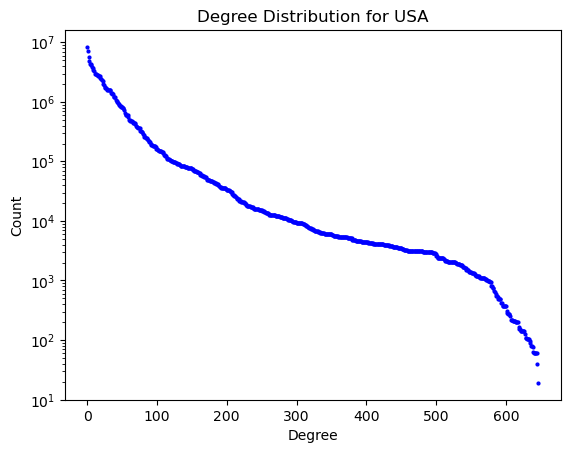

In [14]:
G = nx.from_pandas_edgelist(usa_df, source='ID_Source', target='ID_Target', edge_attr=['Weight'], create_using=nx.MultiDiGraph())
degree=pd.DataFrame(sorted([(n,d) for n, d in G.degree(weight='Weight')], reverse =True), columns=['airport', 'degree'])
degree = degree.sort_values(by='degree', ascending=False).reset_index(drop=True)
degree['normalised'] = degree['degree']/degree['degree'].max()

degree_sorted = sorted([d for n, d in G.degree(weight='Weight')], reverse=True)

plt.plot(degree_sorted,'bo',markersize=2)
plt.title("Degree Distribution for USA")
plt.yscale('log')
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()



# Degree Vs Betweenness for USA

In [15]:
bet_cen = nx.betweenness_centrality(G,normalized=False)

In [17]:
degree = [d for n, d in G.degree()]

In [18]:
df1 = pd.DataFrame(degree, columns =['Degree'])
df2 = pd.DataFrame.from_dict(bet_cen, orient='index', columns=['value'])
df2 = df2.reset_index()
df2 = df2.rename(columns={'index': 'city'})
df = pd.concat([df1, df2], axis=1)
df

,Degree,city,value
0,13,SOV,1585.00000
1,8,KEB,0.50000
2,6,PGM,317.00000
3,13,HOM,3798.50000
4,166,ANC,158244.33906
...,...,...,...
642,2,CZN,635.00000
643,2,GCN,0.00000
644,6,VGT,6.00000
645,2,ELY,0.00000


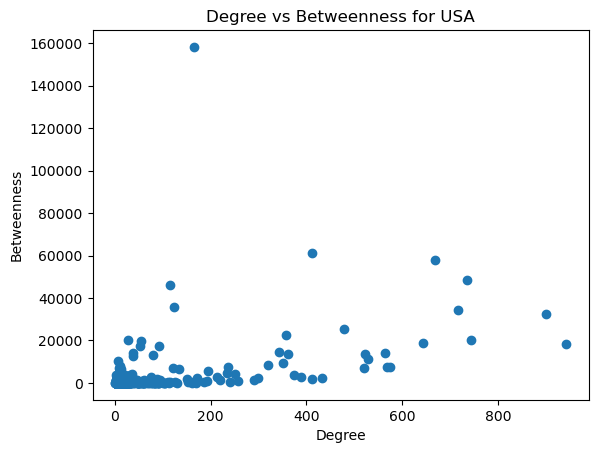

In [19]:
plt.scatter(degree,df['value'])
plt.title("Degree vs Betweenness for USA")
plt.xlabel('Degree')
plt.ylabel('Betweenness')
plt.show()

# Assortavity for USA

In [20]:
assor = nx.degree_pearson_correlation_coefficient(G, x='out', y='in')
print(f'USA Assortavity:{assor}')

degree = [d for n, d in G.degree()]

n_deg_avg = nx.average_neighbor_degree(G, source='out', target='in')



USA Assortavity:-0.12357370428934625


In [21]:
df3 = pd.DataFrame(degree, columns =['Degree'])
df4 = pd.DataFrame.from_dict(n_deg_avg, orient='index', columns=['Average Degree'])
df4 = df4.reset_index()
df4 = df4.rename(columns={'index': 'city'})
df_assor = pd.concat([df3, df4], axis=1)
df_assor

,Degree,city,Average Degree
0,13,SOV,1.875000
1,8,KEB,2.666667
2,6,PGM,4.000000
3,13,HOM,14.833333
4,166,ANC,55.451220
...,...,...,...
642,2,CZN,1.000000
643,2,GCN,3.000000
644,6,VGT,1.000000
645,2,ELY,3.000000


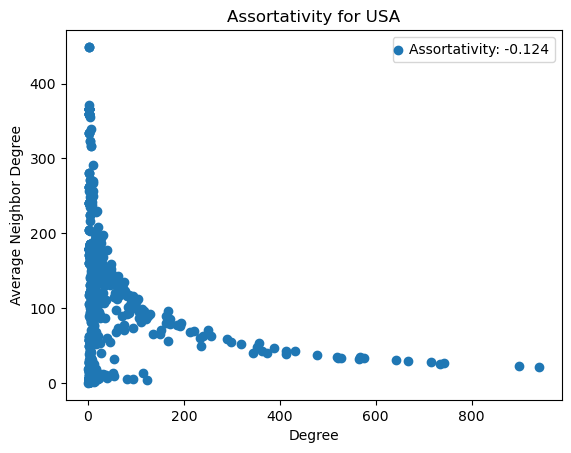

In [22]:
plt.scatter(df_assor['Degree'], df_assor['Average Degree'])
plt.title('Assortativity for USA')
plt.xlabel('Degree')
plt.ylabel('Average Neighbor Degree')
plt.legend([f'Assortativity: {np.round(assor,3)}'], handlelength=0)
plt.show()

# Core Periphery for USA

C:\Users\Aaron Cherian\AppData\Local\Temp\ipykernel_13124\2494337726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  periphery_df['source_degree'] = ''
C:\Users\Aaron Cherian\AppData\Local\Temp\ipykernel_13124\2494337726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  periphery_df['target_degree'] = ''
C:\Users\Aaron Cherian\AppData\Local\Temp\ipykernel_13124\2494337726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

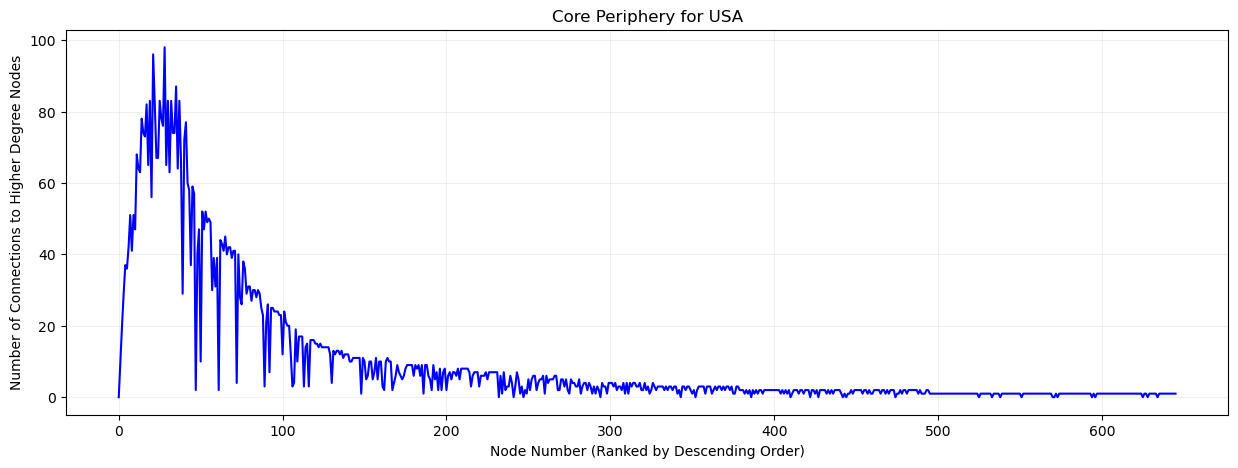

In [57]:
periphery_df = usa_df[['ID_Source', 'ID_Target']]
periphery_df['source_degree'] = ''
periphery_df['target_degree'] = ''
periphery_df['kplus'] = ''
degree_list = G.degree()

for i in range(0, len(periphery_df)):
    periphery_df.loc[i, 'source_degree'] = degree_list[periphery_df.ID_Source[i]]
    periphery_df.loc[i, 'target_degree'] = degree_list[periphery_df.ID_Target[i]]
    
    if periphery_df.target_degree[i] > periphery_df.source_degree[i]:
        periphery_df.loc[i, 'kplus'] = 1
    else:
        periphery_df.loc[i, 'kplus'] = 0
        
plot_periphery = periphery_df.groupby(['ID_Source'],as_index=False).agg({'ID_Source':'first', 'source_degree':'first','kplus':'sum'}).reset_index(drop=True)
plot_periphery = plot_periphery.sort_values(by=['source_degree'], ascending=False).reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(15,5))
ax1.grid('on', alpha=.2)
ax1.set_axisbelow(True)
periphery_data = plot_periphery['kplus'].tolist()
ax1.plot(periphery_data, 'b-')
ax1.set_title('Core Periphery for USA')
ax1.set_xlabel('Node Number (Ranked by Descending Order)')
ax1.set_ylabel('Number of Connections to Higher Degree Nodes')
plt.show()



# Degree Distribution for UK

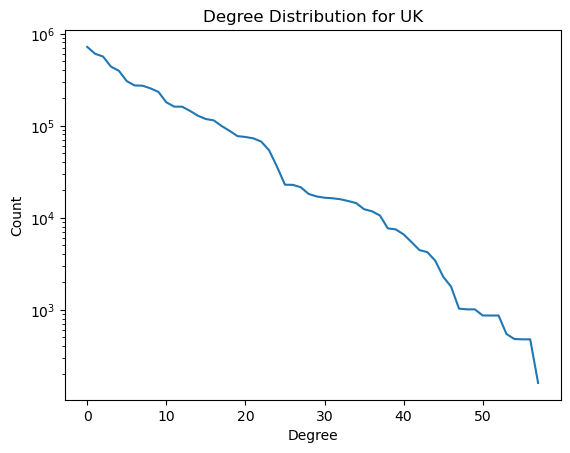

In [58]:
G1 = nx.from_pandas_edgelist(uk_df, source='ID_Source', target='ID_Target', edge_attr=['Weight'], create_using=nx.MultiDiGraph())
degree=pd.DataFrame(sorted([(n,d) for n, d in G1.degree(weight='Weight')], reverse =True), columns=['airport', 'degree'])
degree = degree.sort_values(by='degree', ascending=False).reset_index(drop=True)
degree['normalised'] = degree['degree']/degree['degree'].max()

degree_sorted = sorted([d for n, d in G1.degree(weight='Weight')], reverse=True)

plt.plot(degree_sorted,markersize=2)
plt.title("Degree Distribution for UK")
plt.yscale('log')
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()






# Degree Vs Betweenness for UK

In [28]:
bet_cen_uk = nx.betweenness_centrality(G1,normalized=False)

In [29]:
degree_uk = [d for n, d in G1.degree()]

In [30]:
df1 = pd.DataFrame(degree_uk, columns =['Degree'])
df2 = pd.DataFrame.from_dict(bet_cen_uk, orient='index', columns=['value'])
df2 = df2.reset_index()
df2 = df2.rename(columns={'index': 'city'})
df_uk = pd.concat([df1, df2], axis=1)
df_uk

,Degree,city,value
0,51,IOM,146.740028
1,50,LGW,125.859063
2,83,EDI,342.037439
3,76,BHD,74.888053
4,89,MAN,126.211512
5,96,JER,256.543920
6,8,PLH,7.066026
7,92,GLA,658.670012
8,40,NCL,27.012166
9,52,ABZ,641.419279


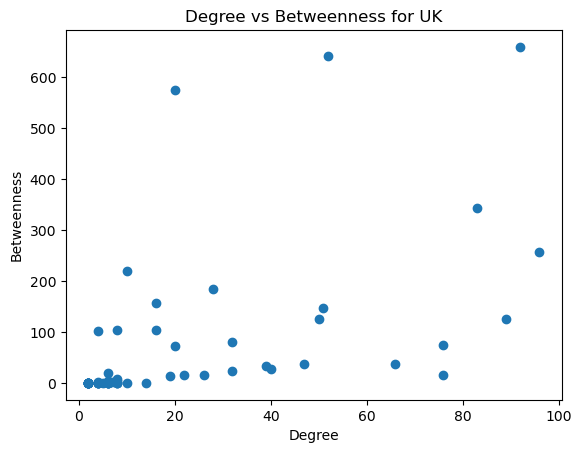

In [31]:
plt.scatter(degree_uk,df_uk['value'])
plt.title('Degree vs Betweenness for UK')
plt.xlabel('Degree')
plt.ylabel('Betweenness')
plt.show()

# Assortavity for UK

In [32]:
assor_uk = nx.degree_pearson_correlation_coefficient(G1, x='out', y='in')
print(f'UK Assortavity:{assor_uk}')

degree_uk = [d for n, d in G1.degree()]

n_deg_avg_uk = nx.average_neighbor_degree(G1, source='out', target='in')


UK Assortavity:0.09295499241352842


In [33]:
df3 = pd.DataFrame(degree_uk, columns =['Degree'])
df4 = pd.DataFrame.from_dict(n_deg_avg_uk, orient='index', columns=['Average Degree'])
df4 = df4.reset_index()
df4 = df4.rename(columns={'index': 'city'})
df_assor_uk = pd.concat([df3, df4], axis=1)
df_assor_uk

,Degree,city,Average Degree
0,51,IOM,12.800000
1,50,LGW,13.840000
2,83,EDI,9.357143
3,76,BHD,10.594595
4,89,MAN,8.577778
5,96,JER,7.875000
6,8,PLH,23.250000
7,92,GLA,9.311111
8,40,NCL,15.789474
9,52,ABZ,11.423077


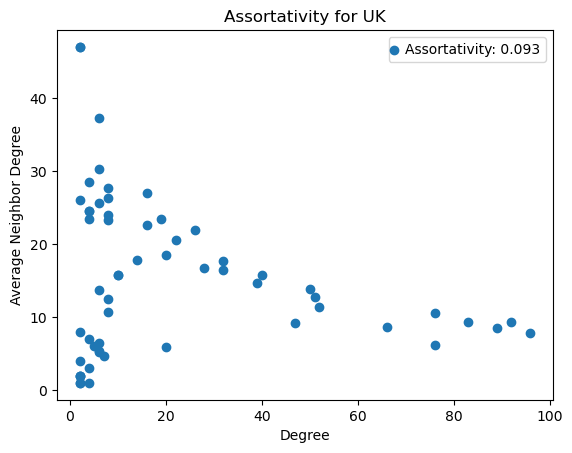

In [34]:
plt.scatter(df_assor_uk['Degree'], df_assor_uk['Average Degree'])
plt.title('Assortativity for UK')
plt.xlabel('Degree')
plt.ylabel('Average Neighbor Degree')
plt.legend([f'Assortativity: {np.round(assor_uk,3)}'], handlelength=0)
plt.show()

# Core Periphery for UK

C:\Users\Aaron Cherian\AppData\Local\Temp\ipykernel_13124\1699604396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  periphery_uk_df['source_degree'] = ''
C:\Users\Aaron Cherian\AppData\Local\Temp\ipykernel_13124\1699604396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  periphery_uk_df['target_degree'] = ''
C:\Users\Aaron Cherian\AppData\Local\Temp\ipykernel_13124\1699604396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

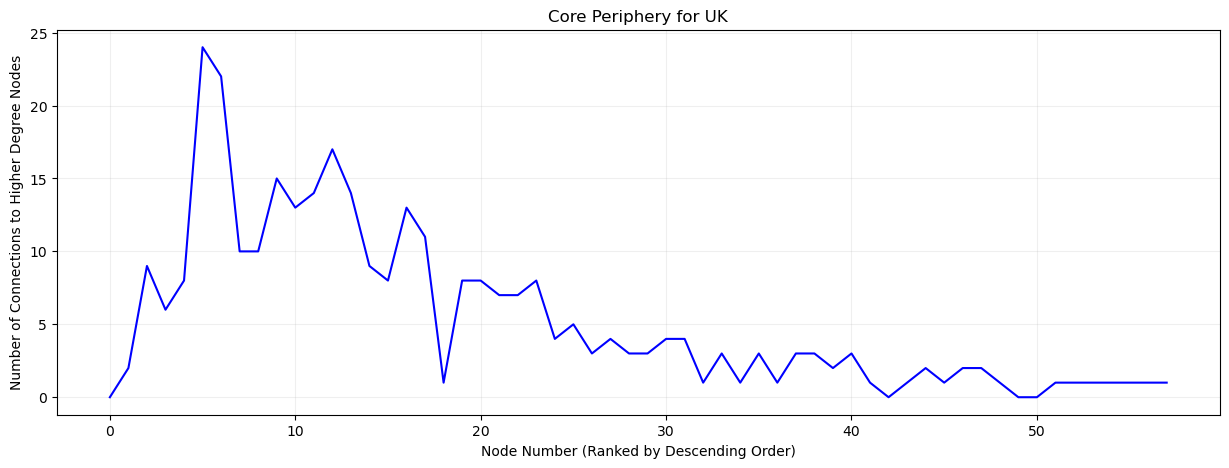

Text(649.5, 27.0, 'Periphery Nodes: 53')

In [35]:
periphery_uk_df = uk_df[['ID_Source', 'ID_Target']]
periphery_uk_df['source_degree'] = ''
periphery_uk_df['target_degree'] = ''
periphery_uk_df['kplus'] = ''
degree_list_uk = G1.degree()

for i in range(0, len(periphery_uk_df)):
    periphery_uk_df.loc[i, 'source_degree'] = degree_list_uk[periphery_uk_df.ID_Source[i]]
    periphery_uk_df.loc[i, 'target_degree'] = degree_list_uk[periphery_uk_df.ID_Target[i]]
    
    if periphery_uk_df.target_degree[i] > periphery_uk_df.source_degree[i]:
        periphery_uk_df.loc[i, 'kplus'] = 1
    else:
        periphery_uk_df.loc[i, 'kplus'] = 0
        
plot_periphery_uk = periphery_uk_df.groupby(['ID_Source'],as_index=False).agg({'ID_Source':'first', 'source_degree':'first','kplus':'sum'}).reset_index(drop=True)
plot_periphery_uk = plot_periphery_uk.sort_values(by=['source_degree'], ascending=False).reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(15,5))
ax1.grid('on', alpha=.2)
ax1.set_axisbelow(True)
periphery_data_uk = plot_periphery_uk['kplus'].tolist()
ax1.plot(periphery_data_uk, 'b-')
ax1.set_title('Core Periphery for UK')
ax1.set_xlabel('Node Number (Ranked by Descending Order)')
ax1.set_ylabel('Number of Connections to Higher Degree Nodes')
plt.show()


# Degree Distribution for China

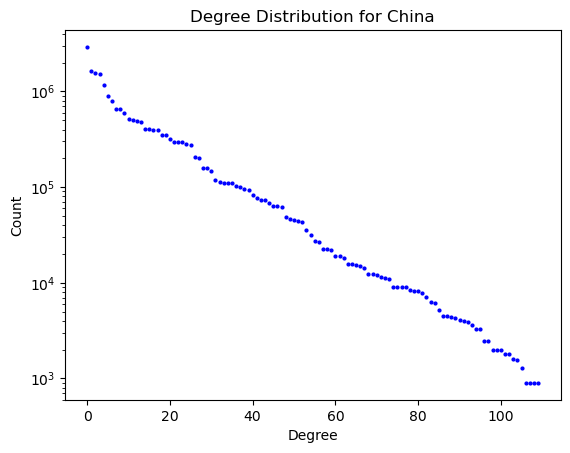

In [37]:
G2 = nx.from_pandas_edgelist(china_df, source='ID_Source', target='ID_Target', edge_attr=['Weight'], create_using=nx.MultiDiGraph())
degree_china = pd.DataFrame(sorted([(n,d) for n, d in G2.degree(weight='Weight')], reverse =True), columns=['airport', 'degree'])
degree_china = degree_china.sort_values(by='degree', ascending=False).reset_index(drop=True)
degree_china['normalised'] = degree_china['degree']/degree['degree'].max()

degree_sorted_china = sorted([d for n, d in G2.degree(weight='Weight')], reverse=True)

plt.plot(degree_sorted_china,'bo',markersize=2)
plt.title("Degree Distribution for China")
plt.yscale('log')
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

# Degree Vs Betweenness for China

In [38]:
bet_cen_china = nx.betweenness_centrality(G2,normalized=False)

In [39]:
degree_china = [d for n, d in G2.degree()]

In [40]:
df1 = pd.DataFrame(degree_china, columns =['Degree'])
df2 = pd.DataFrame.from_dict(bet_cen_china, orient='index', columns=['value'])
df2 = df2.reset_index()
df2 = df2.rename(columns={'index': 'city'})
df_china = pd.concat([df1, df2], axis=1)
df_china

,Degree,city,value
0,289,SZX,1309.528784
1,152,XMN,137.235913
2,527,PEK,3714.975948
3,268,CAN,1597.459277
4,154,CKG,734.522301
...,...,...,...
105,2,TCG,0.000000
106,4,KCA,0.000000
107,2,YIN,0.000000
108,4,AKU,0.000000


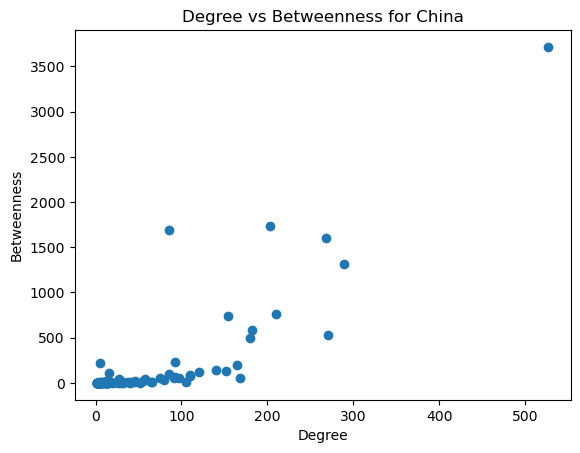

In [41]:
plt.scatter(degree_china,df_china['value'])
plt.title('Degree vs Betweenness for China')
plt.xlabel('Degree')
plt.ylabel('Betweenness')
plt.show()

# Assortavity of China

In [42]:
assor_china = nx.degree_pearson_correlation_coefficient(G2, x='out', y='in')
print(f'China Assortavity:{assor_china}')

degree_china = [d for n, d in G2.degree()]

n_deg_avg_china = nx.average_neighbor_degree(G2, source='out', target='in')


China Assortavity:-0.20562915926166864


In [43]:
df3 = pd.DataFrame(degree_china, columns =['Degree'])
df4 = pd.DataFrame.from_dict(n_deg_avg_china, orient='index', columns=['Average Degree'])
df4 = df4.reset_index()
df4 = df4.rename(columns={'index': 'city'})
df_assor_china = pd.concat([df3, df4], axis=1)
df_assor_china

,Degree,city,Average Degree
0,289,SZX,13.324138
1,152,XMN,27.116883
2,527,PEK,8.411321
3,268,CAN,15.849624
4,154,CKG,26.013158
...,...,...,...
105,2,TCG,42.000000
106,4,KCA,22.000000
107,2,YIN,42.000000
108,4,AKU,22.000000


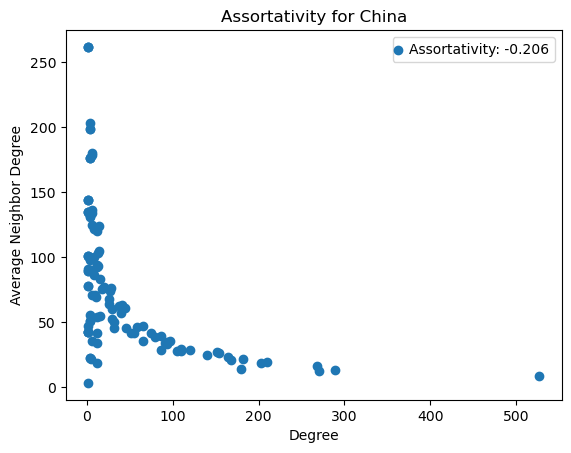

In [44]:
plt.scatter(df_assor_china['Degree'], df_assor_china['Average Degree'])
plt.title('Assortativity for China')
plt.xlabel('Degree')
plt.ylabel('Average Neighbor Degree')
plt.legend([f'Assortativity: {np.round(assor_china,3)}'], handlelength=0)
plt.show()

# Core Periphery for China

C:\Users\Aaron Cherian\AppData\Local\Temp\ipykernel_13124\2039832011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  periphery_china_df['source_degree'] = ''
C:\Users\Aaron Cherian\AppData\Local\Temp\ipykernel_13124\2039832011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  periphery_china_df['target_degree'] = ''
C:\Users\Aaron Cherian\AppData\Local\Temp\ipykernel_13124\2039832011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

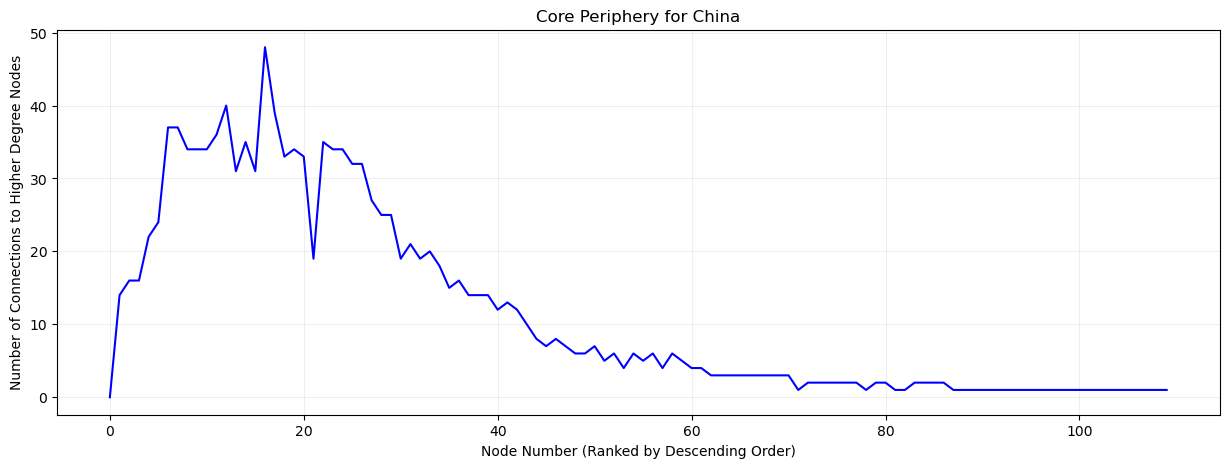

In [59]:
periphery_china_df = china_df[['ID_Source', 'ID_Target']]
periphery_china_df['source_degree'] = ''
periphery_china_df['target_degree'] = ''
periphery_china_df['kplus'] = ''
degree_list = G2.degree()

for i in range(0, len(periphery_china_df)):
    periphery_china_df.loc[i, 'source_degree'] = degree_list[periphery_china_df.ID_Source[i]]
    periphery_china_df.loc[i, 'target_degree'] = degree_list[periphery_china_df.ID_Target[i]]
    
    if periphery_china_df.target_degree[i] > periphery_china_df.source_degree[i]:
        periphery_china_df.loc[i, 'kplus'] = 1
    else:
        periphery_china_df.loc[i, 'kplus'] = 0
        
plot_periphery_china = periphery_china_df.groupby(['ID_Source'],as_index=False).agg({'ID_Source':'first', 'source_degree':'first','kplus':'sum'}).reset_index(drop=True)
plot_periphery_china = plot_periphery_china.sort_values(by=['source_degree'], ascending=False).reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(15,5))
ax1.grid('on', alpha=.2)
ax1.set_axisbelow(True)
periphery_data_china = plot_periphery_china['kplus'].tolist()
ax1.set_title('Core Periphery for China')
ax1.plot(periphery_data_china, 'b-')
ax1.set_xlabel('Node Number (Ranked by Descending Order)')
ax1.set_ylabel('Number of Connections to Higher Degree Nodes')
plt.show()

  

# Degree Distribution for Australia

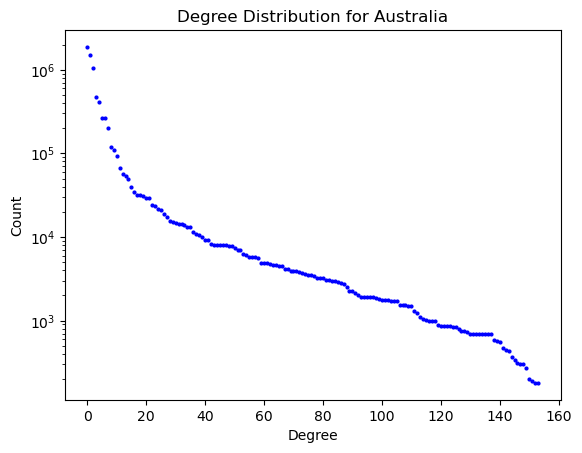

In [48]:
G3 = nx.from_pandas_edgelist(aus_df, source='ID_Source', target='ID_Target', edge_attr=['Weight'], create_using=nx.MultiDiGraph())
degree_aus = pd.DataFrame(sorted([(n,d) for n, d in G3.degree(weight='Weight')], reverse =True), columns=['airport', 'degree'])
degree_aus = degree_aus.sort_values(by='degree', ascending=False).reset_index(drop=True)
degree_aus['normalised'] = degree_aus['degree']/degree['degree'].max()

degree_sorted_aus = sorted([d for n, d in G3.degree(weight='Weight')], reverse=True)

plt.plot(degree_sorted_aus,'bo',markersize=2)
plt.title("Degree Distribution for Australia")
plt.yscale('log')
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

# Degree Vs Betweenness for Australia

In [49]:
bet_cen_aus = nx.betweenness_centrality(G3,normalized=False)

In [50]:
degree_aus = [d for n, d in G3.degree()]

In [51]:
df1 = pd.DataFrame(degree_aus, columns =['Degree'])
df2 = pd.DataFrame.from_dict(bet_cen_aus, orient='index', columns=['value'])
df2 = df2.reset_index()
df2 = df2.rename(columns={'index': 'city'})
df_aus = pd.concat([df1, df2], axis=1)
df_aus

,Degree,city,value
0,241,SYD,7999.896104
1,156,MEL,2896.915945
2,134,PER,5221.800794
3,94,CNS,7395.265152
4,40,OOL,98.830952
...,...,...,...
149,2,XTG,0.000000
150,4,WGE,304.000000
151,2,LHG,0.000000
152,2,BRK,0.000000


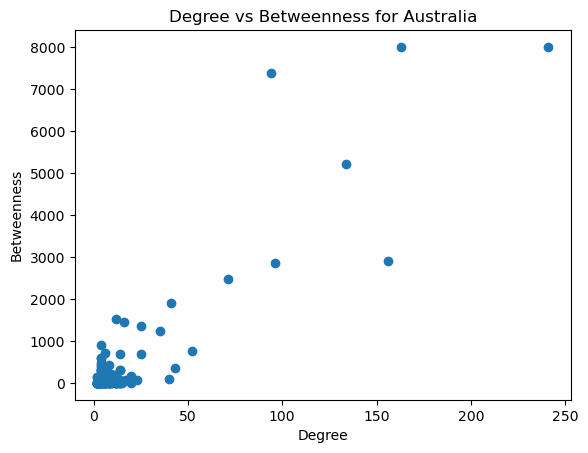

In [52]:
plt.scatter(degree_aus,df_aus['value'])
plt.title('Degree vs Betweenness for Australia')
plt.xlabel('Degree')
plt.ylabel('Betweenness')
plt.show()

# Assortavity for Australia

In [53]:
assor_aus = nx.degree_pearson_correlation_coefficient(G3, x='out', y='in')
print(f'Australia Assortavity:{assor_aus}')

degree_aus = [d for n, d in G3.degree()]

n_deg_avg_aus = nx.average_neighbor_degree(G3, source='out', target='in')


Australia Assortavity:-0.04306245504233954


In [54]:
df3 = pd.DataFrame(degree_aus, columns =['Degree'])
df4 = pd.DataFrame.from_dict(n_deg_avg_aus, orient='index', columns=['Average Degree'])
df4 = df4.reset_index()
df4 = df4.rename(columns={'index': 'city'})
df_assor_aus = pd.concat([df3, df4], axis=1)
df_assor_aus

,Degree,city,Average Degree
0,241,SYD,4.708333
1,156,MEL,7.025641
2,134,PER,6.782609
3,94,CNS,9.708333
4,40,OOL,19.250000
...,...,...,...
149,2,XTG,2.000000
150,4,WGE,1.500000
151,2,LHG,2.000000
152,2,BRK,2.000000


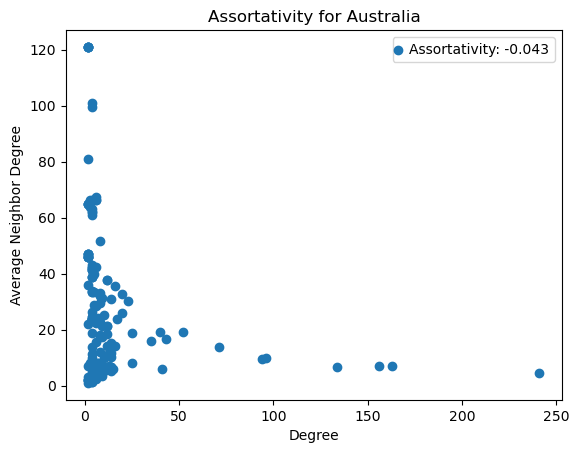

In [55]:
plt.scatter(df_assor_aus['Degree'], df_assor_aus['Average Degree'])
plt.title('Assortativity for Australia')
plt.xlabel('Degree')
plt.ylabel('Average Neighbor Degree')
plt.legend([f'Assortativity: {np.round(assor_aus,3)}'], handlelength=0)
plt.show()

# Core Periphery for Australia

C:\Users\Aaron Cherian\AppData\Local\Temp\ipykernel_13124\3927183870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  periphery_aus_df['source_degree'] = ''
C:\Users\Aaron Cherian\AppData\Local\Temp\ipykernel_13124\3927183870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  periphery_aus_df['target_degree'] = ''
C:\Users\Aaron Cherian\AppData\Local\Temp\ipykernel_13124\3927183870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

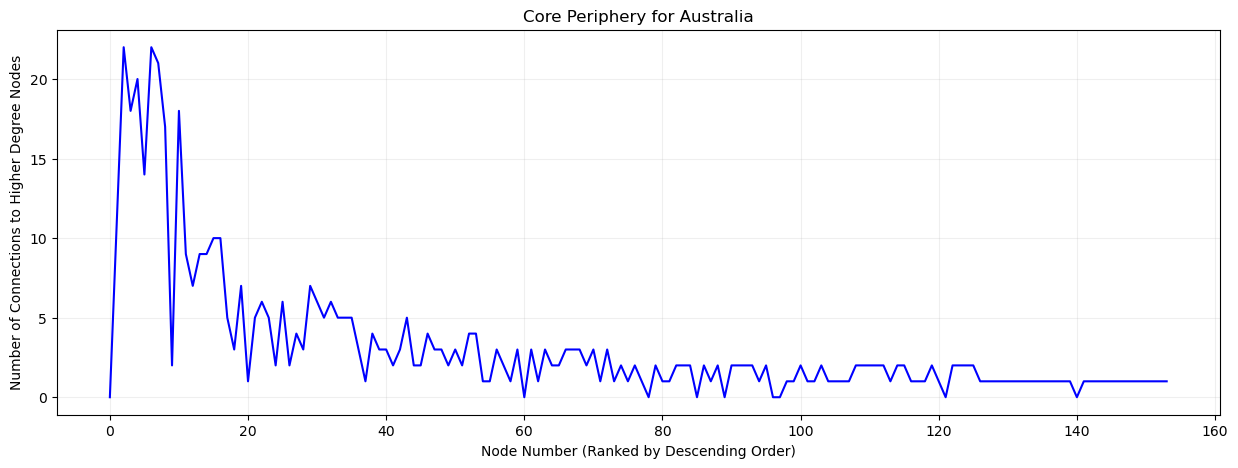

In [60]:
periphery_aus_df = aus_df[['ID_Source', 'ID_Target']]
periphery_aus_df['source_degree'] = ''
periphery_aus_df['target_degree'] = ''
periphery_aus_df['kplus'] = ''
degree_list = G3.degree()

for i in range(0, len(periphery_aus_df)):
    periphery_aus_df.loc[i, 'source_degree'] = degree_list[periphery_aus_df.ID_Source[i]]
    periphery_aus_df.loc[i, 'target_degree'] = degree_list[periphery_aus_df.ID_Target[i]]
    
    if periphery_aus_df.target_degree[i] > periphery_aus_df.source_degree[i]:
        periphery_aus_df.loc[i, 'kplus'] = 1
    else:
        periphery_aus_df.loc[i, 'kplus'] = 0
        
plot_periphery_aus = periphery_aus_df.groupby(['ID_Source'],as_index=False).agg({'ID_Source':'first', 'source_degree':'first','kplus':'sum'}).reset_index(drop=True)
plot_periphery_aus = plot_periphery_aus.sort_values(by=['source_degree'], ascending=False).reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(15,5))
ax1.grid('on', alpha=.2)
ax1.set_axisbelow(True)
periphery_data_aus = plot_periphery_aus['kplus'].tolist()
ax1.plot(periphery_data_aus, 'b-')
ax1.set_title('Core Periphery for Australia')
ax1.set_xlabel('Node Number (Ranked by Descending Order)')
ax1.set_ylabel('Number of Connections to Higher Degree Nodes')
plt.show()

